In [1]:
# Python packages

import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse  
import numpy as np
import os

In [2]:
## Arange errors in pipes indices

### --> Generated code from Gemini
import os
from openpyxl import load_workbook

def update_xlsx_files(folder_path):
  """
  This function iterates through all .xlsx files in a folder,
  opens the sheet named "pipes", adds 1 to "x" and "y" columns,
  and saves the modified file.
  """
  for file_dir in os.listdir(folder_path):
    for filename in os.listdir(os.path.join(folder_path, file_dir)):
        print(filename)
        if filename.endswith(".xlsx"):
          try:
              filepath = os.path.join(folder_path, file_dir, filename)
              workbook = load_workbook(filepath)
              worksheet = workbook["pipes"]
              
              # Iterate through rows (skipping the header row)
              for row in worksheet.iter_rows(min_row=2):
                  row[0].value += 1  # Update cell value in "start node" column (index 0)
                  row[1].value += 1  # Update cell value in "end node" column (index 2)
              
              workbook.save(filepath)
              print(f"File '{filepath}' updated successfully!")
              
          except Exception as ex:
              print(ex)
            
def update_xlsx_files_v2(filepath):
  """
  This function iterates through all .xlsx files in a folder,
  opens the sheet named "pipes", adds 1 to "x" and "y" columns using vectorized operations,
  and saves the modified file.
  """
  workbook = load_workbook(filepath)
  worksheet = workbook["pipes"]
  
  # Get data for "x" and "y" columns as separate lists (assuming numeric data)
  x_data = list(cell.value for cell in worksheet["B"])[1:]  # Skip header row (index starts at 1)
  y_data = list(cell.value for cell in worksheet["C"])[1:]
  
  # Add 1 to all elements in lists using vectorized operation
  x_data = [x + 1 for x in x_data]
  y_data = [y + 1 for y in y_data]
  
  # Update data back to the sheet (assuming columns B and C)
  for i, value in enumerate(x_data, start=2):  # Start at row 2 (index)
    worksheet.cell(row=i, column=2).value = value
  for i, value in enumerate(y_data, start=2):
    worksheet.cell(row=i, column=3).value = value
  
  workbook.save(filepath)
  print(f"File '{filepath}' updated successfully!")
      
def modify_excel_file(file_path):
    # Load the workbook and select the "pipes" sheet
    workbook = load_workbook(file_path)
    if "pipes" in workbook.sheetnames:
        sheet = workbook["pipes"]
        
        # Iterate over the rows and modify the values in columns "x" and "y"
        for row in sheet.iter_rows(min_row=2, min_col=1, max_col=2):  # Assuming headers are in the first row
            for cell in row:
                if cell.column_letter in ['start node', 'end node']:  # Assuming 'x' is in column A and 'y' in column B
                    try:
                        cell.value = cell.value + 1
                    except TypeError:
                        pass  # In case the cell is not numeric, do nothing

        # Save the changes
        workbook.save(file_path)

# # Replace 'path/to/your/folder' with the actual folder path containing .xlsx files
# folder_path = 'Synthetic_DHNs'
# update_xlsx_files(folder_path)

In [31]:
# # Replace 'path/to/your/folder' with the actual folder path containing .xlsx files
folder_path = 'Synthetic_DHNs'
update_xlsx_files(folder_path)

topology.xlsx
File 'Synthetic_DHNs\DHN1\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\Generated_DHN\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_0\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_1\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_10\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_11\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_12\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_13\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_14\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_15\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\synthetic_dhn_16\topology.xlsx' updated successfully!
topology.xlsx
File 'Synthetic_DHNs\syn

In [ ]:
excel_files_paths = []
for file_dir in os.listdir(folder_path):
    for filename in os.listdir(os.path.join(folder_path, file_dir)):
        if filename.endswith(".xlsx"):
            filepath = os.path.join(folder_path, file_dir, filename)
            excel_files_paths.append(filepath)

In [ ]:
for file in excel_files_paths[2:]:
    if os.path.isfile(file):
        # modify_excel_file(file)
        update_xlsx_files_v2(file)
    else:
        print(f"File not found: {file}")

In [20]:
file

'Synthetic_DHNs\\synthetic_dhn_0\\topology.xlsx'

In [24]:
os.path.isfile(file)

True

In [10]:
heating_profiles = pd.read_csv(os.path.join('src', 'files', 'heating_demands_profiles_v2.csv'))

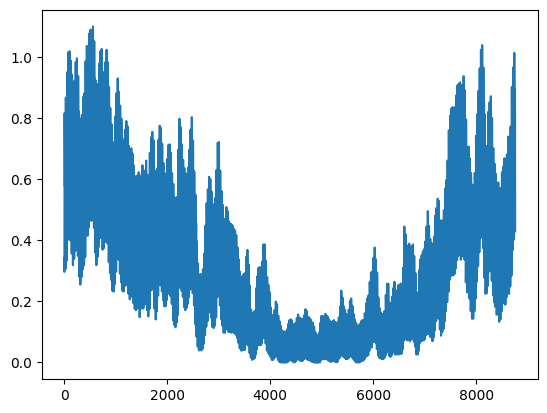

In [11]:
plt.plot(heating_profiles['SFH'][:])